<a href="https://colab.research.google.com/github/tottorrZ/229352-StatisticalLearning/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

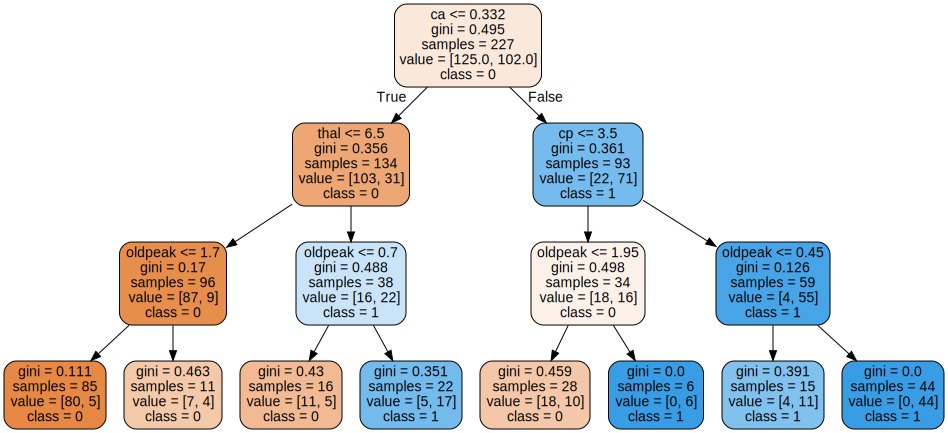

In [6]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [7]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [9]:
from sklearn.metrics import classification_report

forest = RandomForestClassifier(n_estimators=200, max_depth=6)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        39
           1       0.88      0.76      0.81        37

    accuracy                           0.83        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import graphviz

In [11]:
df = pd.read_csv("heart_disease.csv")

In [12]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

In [13]:
#Decision
dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42))
])
dt_params = {
    'decisiontreeclassifier__max_depth': [3, 5, 7, 10],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 3, 5]
}
dt_grid = GridSearchCV(dt_pipe, dt_params, cv=5, scoring='f1_macro', refit=True)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'sex',
                                                                          'cp',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'thalach',
                                                                          'exang',
                                                                          'oldpeak',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'decisiontreeclassifier__max_depth': [3, 5, 7, 10],
                         'decisiontreeclassifier__min_samples_leaf': [1, 3, 5],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='f1_macro')

In [14]:
#Bagging Classifier
bagging_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('baggingclassifier', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ))
])

bagging_params = {
    'baggingclassifier__n_estimators': [50, 100, 150],
    'baggingclassifier__max_samples': [0.5, 0.7, 1.0],
    'baggingclassifier__estimator__max_depth': [3, 5, 10]
}
bagging_grid = GridSearchCV(bagging_pipe, bagging_params, cv=5, scoring='f1_macro', refit=True)
bagging_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'sex',
                                                                          'cp',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'thalach',
                                                                          'exang',
                                                                          'oldpeak',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal'])])),
                                       ('baggingclassifier',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                          random_state=42))]),
             param_grid={'baggingclassifier__estimator__max_depth': [3, 5, 10],
                         'baggingclassifier__max_samples': [0.5, 0.7, 1.0],
                         'baggingclassifier__n_estimators': [50, 100, 150]},
             scoring='f1_macro')

In [15]:
#Random Forest
forest_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])
forest_params = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [5, 8, 10],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}
forest_grid = GridSearchCV(forest_pipe, forest_params, cv=5, scoring='f1_macro', refit=True)
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'sex',
                                                                          'cp',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'thalach',
                                                                          'exang',
                                                                          'oldpeak',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [5, 8, 10],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             scoring='f1_macro')

In [16]:
print("=== Decision Tree ===")
print(classification_report(y_test, dt_grid.predict(X_test)))

print("=== Bagged Decision Trees ===")
print(classification_report(y_test, bagging_grid.predict(X_test)))

print("=== Random Forest ===")
print(classification_report(y_test, forest_grid.predict(X_test)))

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.70      0.82      0.75        28

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

=== Bagged Decision Trees ===
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.83      0.86      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61


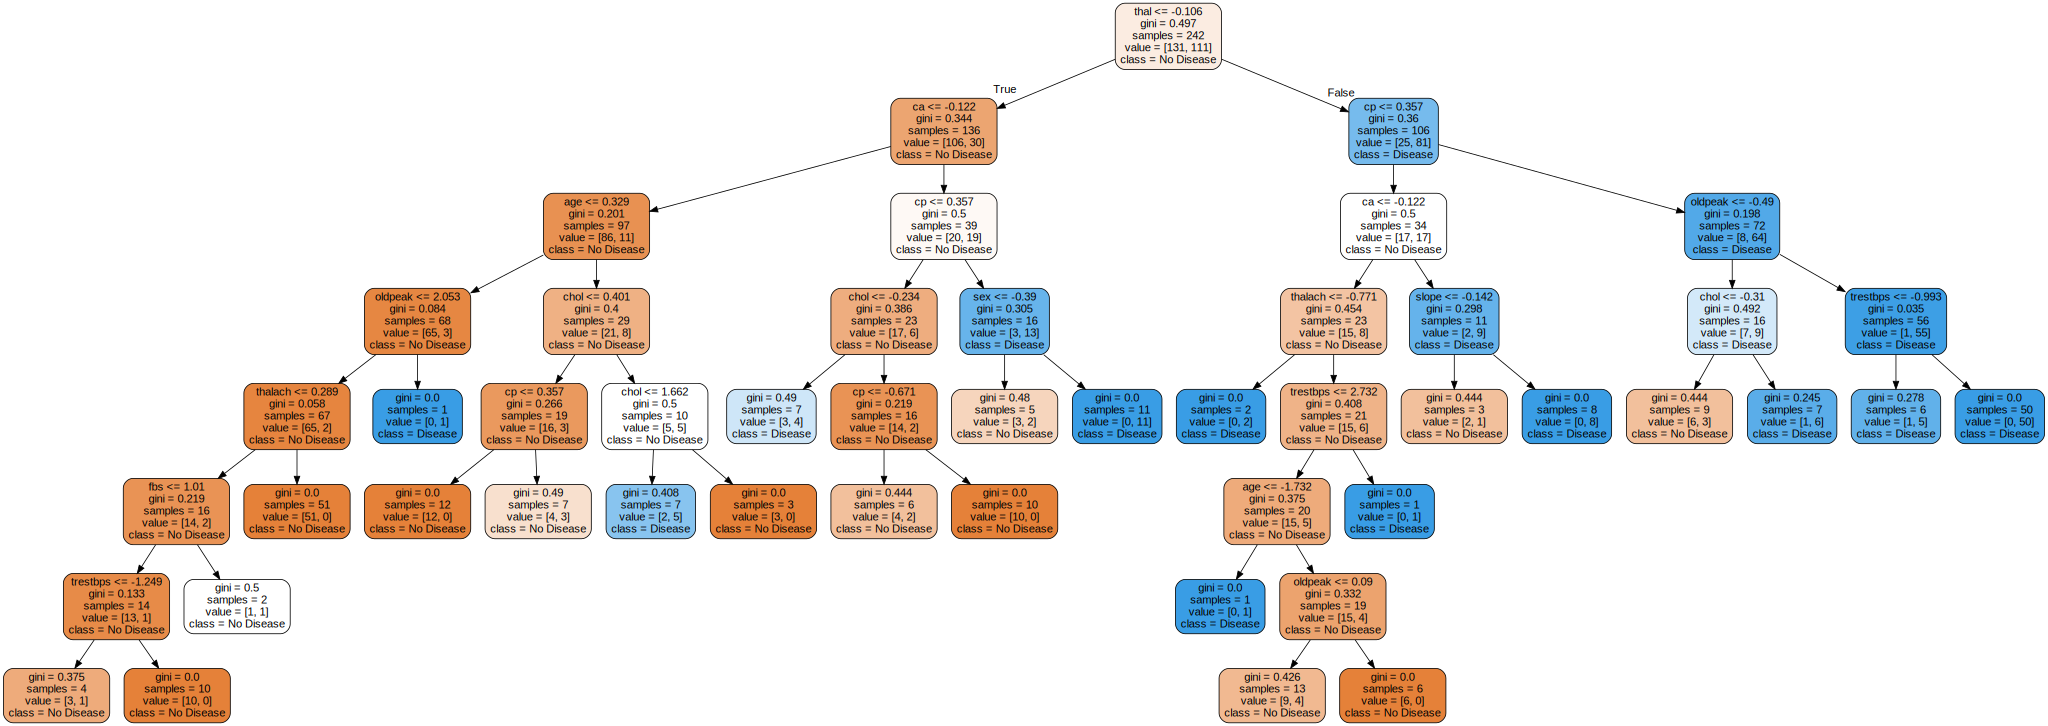

In [17]:
best_dt = dt_grid.best_estimator_.named_steps["decisiontreeclassifier"]
dot_data = export_graphviz(
    best_dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"]
)
graph = graphviz.Source(dot_data)
graph.render("best_tree", format='png', cleanup=False)
graph